In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [8]:
data1 = pd.read_csv('../data.csv')
data1 = data1.fillna(value = 0)
X1 = data1.loc[:, ['Monthly Income', 'Purchasing Power Index']].values
data1.head()

,Rank,Country/Region,Cost Index,Monthly Income,Purchasing Power Index
0,1,Bermuda *,157.9,10437.0,103.8
1,2,Cayman Islands *,138.3,5433.0,61.7
2,3,Switzerland,131.4,7454.0,89.1
3,4,Turks and Caicos Islands *,124.6,2013.0,25.4
4,5,Israel,123.1,4554.0,58.1


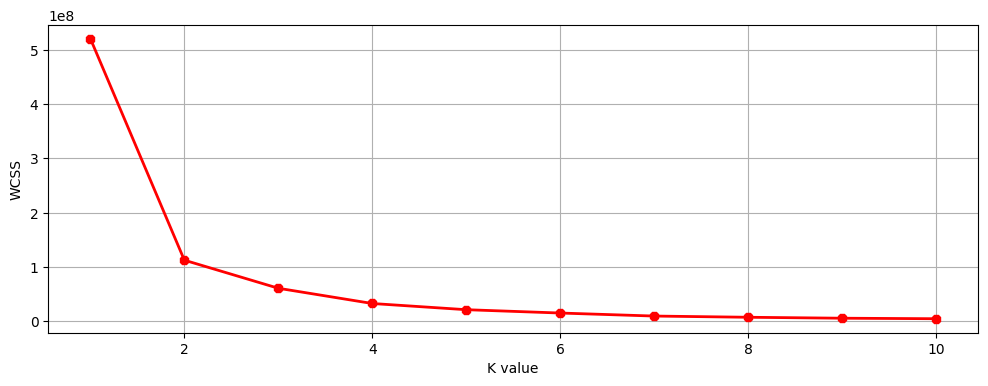

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [237]:
n = 3

In [238]:
kmeans = KMeans(n_clusters=n)
label = kmeans.fit_predict(X1)
print(label)

[2 1 2 0 1 0 1 2 2 2 1 1 0 2 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [239]:
print(kmeans.cluster_centers_)

[[ 675.           23.05362319]
 [4248.08         77.816     ]
 [7524.28571429  101.12857143]]


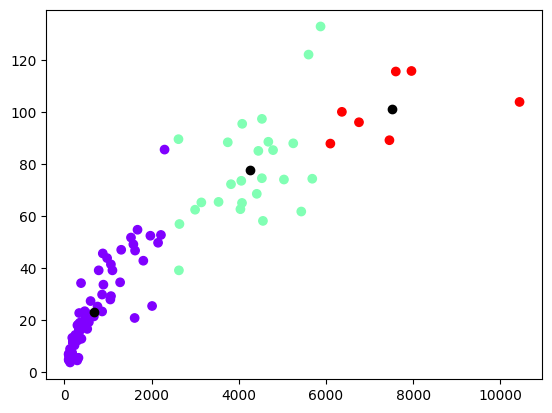

In [240]:
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.show()